In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv('../1_Simple_Linear_Regression/placement.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'Package(in lpa)')

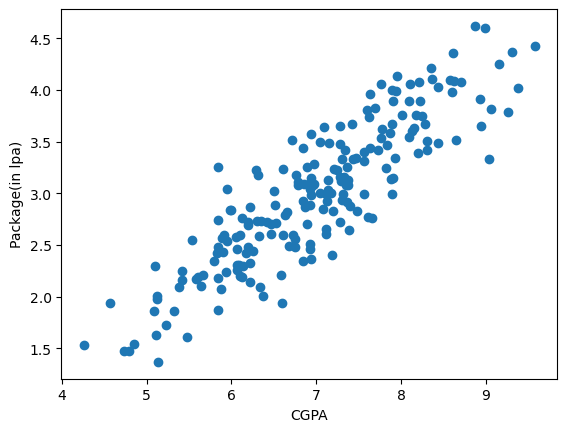

In [71]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [72]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [74]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 1), (160,), (40, 1), (40,))

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr = LinearRegression()

In [77]:
lr.fit(X_train,y_train)

LinearRegression()

In [78]:
X_test.iloc[1].values, y_test.iloc[1]

(array([7.15]), 3.49)

In [79]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

Text(0, 0.5, 'Package(in lpa)')

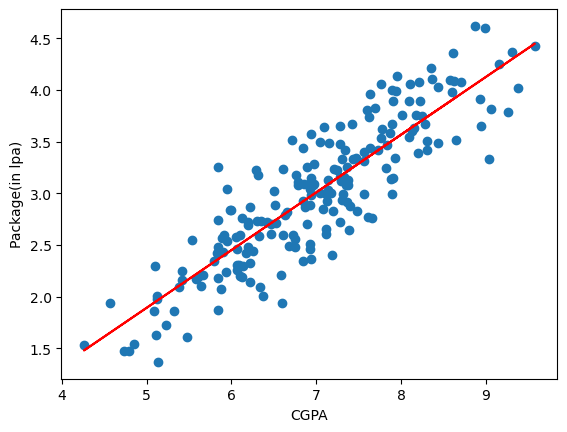

In [80]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [82]:
y_pred = lr.predict(X_test)

In [83]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [84]:
print("Mean Squared error",mean_squared_error(y_test,y_pred))

Mean Squared error 0.12129235313495527


In [85]:
print("Mean Absolute error",mean_absolute_error(y_test,y_pred))

Mean Absolute error 0.2884710931878175


In [86]:
print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared error 0.34827051717731616


In [87]:
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.780730147510384


In [88]:
r2 = r2_score(y_test,y_pred)
print("Adjusted R2 Score",1 - ((1-r2)*(40-1)/(40-1-2)))

Adjusted R2 Score 0.7688777230514858


# After Non-effective column add

In [89]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1

,cgpa,random_feature,package
0,6.89,0.388460,3.26
1,5.12,0.518013,1.98
2,7.82,0.847735,3.25
3,7.42,0.176968,3.67
4,6.94,0.274515,3.57
...,...,...,...
195,6.93,0.749124,2.46
196,5.89,0.634224,2.57
197,7.21,0.815071,3.24
198,7.63,0.728696,3.96


Text(0, 0.5, 'Package(in lpa)')

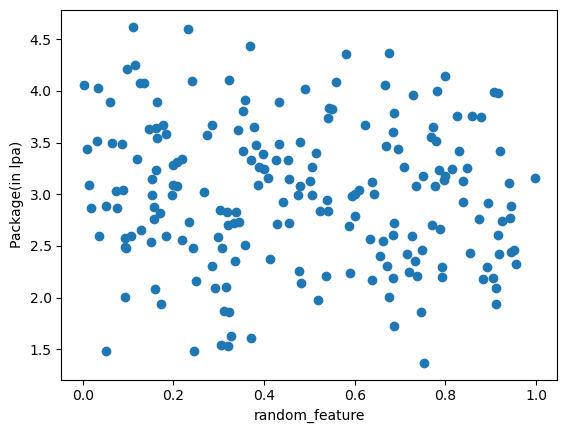

In [90]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [91]:
X = new_df1.iloc[:, 0:2]
y = new_df1.iloc[:, -1]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [93]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

##### R2 Score

In [94]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7802759626650237


##### Adjusted R2 Score

In [95]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.768398987673944

# After Effective column add

In [96]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12, 12, 200) / 10)

new_df2 = new_df2[['cgpa', 'iq', 'package']]
new_df2.sample(5)

,cgpa,iq,package
42,5.95,2.64,2.54
97,5.98,2.44,2.84
173,6.75,1.86,2.56
133,6.05,1.58,2.58
144,6.17,1.52,2.42


Text(0, 0.5, 'Package(in lpa)')

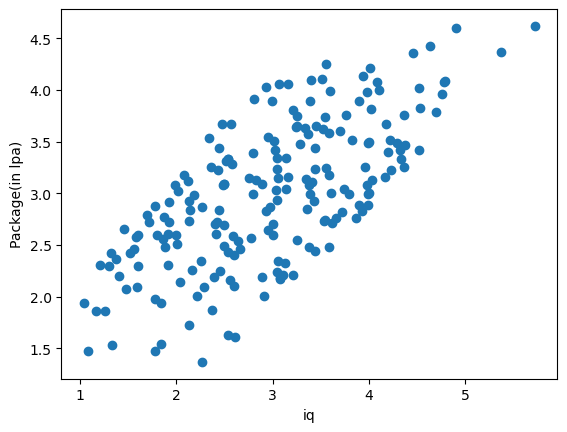

In [97]:
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [98]:
np.random.randint(-100, 100)

-67

In [99]:
X = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [101]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("R2 score", r2_score(y_test, y_pred))

R2 score 0.8325111568371013


In [102]:
r2 = r2_score(y_test, y_pred)
1 - ((1 - r2) * (40 - 1) / (40 - 1 - 2))

0.823457705855323